In [1]:
## 30/01/20- This is just to plot the output of anything I run in Parcels, before doing the post-processing (track where particle is in vertical)
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np 

rho = '920' #'allrho' 
res = '2x2'
size = 'r1e-04' #'allr' #'r1e-02' #0.01' #
# s = 'JJA'
# yr = '2001'
# loc = 'eq_global'
dirwrite = '/home/dlobelle/Kooi_data/data_output/1D_results/' #rho_'+rho+'kgm-3/res_'+res+'/'+size+'/' #rho_920kgm-3/res_2x2/' #/'+size+'

data = Dataset(dirwrite +'run1_150d_rho920_rpl10-4_v3.nc') #loc+'_'+s+'_'+yr+'_3D_grid'+res+'_rho'+rho+'_'+size+'_90days_60dtsecs_12hrsoutdt.nc')  #'+size+'_90days_60dtsecs_12hrsoutdt.nc')
#data = Dataset(dirwrite+'south_global_JJA_2002_3D_grid2x2_rho920_r1e-05_90days_60dtsecs_12hrsoutdt.nc') 

In [45]:
# data = Dataset('/home/dlobelle/Kooi_data/data_output/allrho/res_10x10/allr/SAtl_MAM_2001_3D_grid10x10_allrho_allr_1days_60dtsecs_12hrsoutdt.nc')
# print(data)
# r_pl = data['r_pl'][:]
# rho_pl = data['rho_pl'][:]
# print(r_pl, rho_pl)

Text(0.5, 1.0, 'eq_global_920kgm-3_r1e-04_JJA_2001')

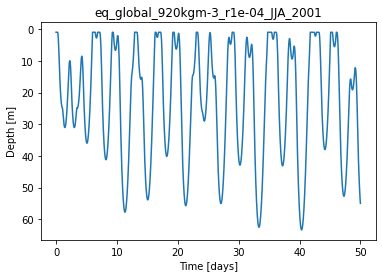

In [3]:
t0 = data['time'][:]/86400 #[1:40,:]
d0 = data['z'][:]

idx = t0[0,:]>=100.
t = t0[:,idx]
d = d0[:,idx]

t = t-(t[0][0])
plt.plot(t.T,d.T)
plt.gca().invert_yaxis()
plt.xlabel('Time [days]')
plt.ylabel('Depth [m]')
plt.title(loc+'_'+rho+'kgm-3_'+size+'_'+s+'_'+yr)
#print(t.shape)
#print(d.T[-1])

In [9]:
time = data['time'][:].squeeze()
lons = data['lon'][:].squeeze()
print(lons[:,0].shape)

(38480,)


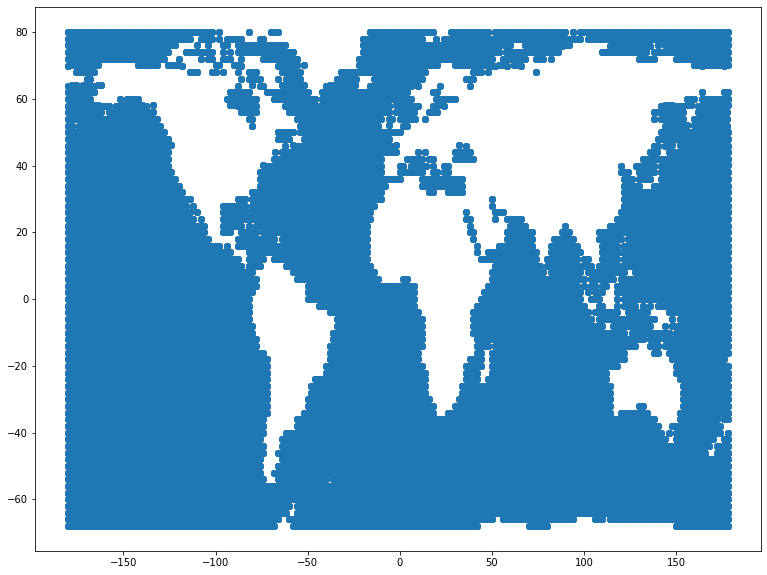

In [10]:
# time = data['time'][:].squeeze()
# lons = data['lon'][:].squeeze()
# lats = data['lat'][:].squeeze()
# depth = data['z'][:].squeeze()

# plt.figure(figsize=(13,10))
# plt.scatter(lons[:,0],lats[:,0]) #,c=time,cmap=plt.cm.jet)
# # ax.set_xlabel('longitude')
# # ax.set_ylabel('latitude')
# # ax.set_zlabel('depth')
# # ax.invert_zaxis()

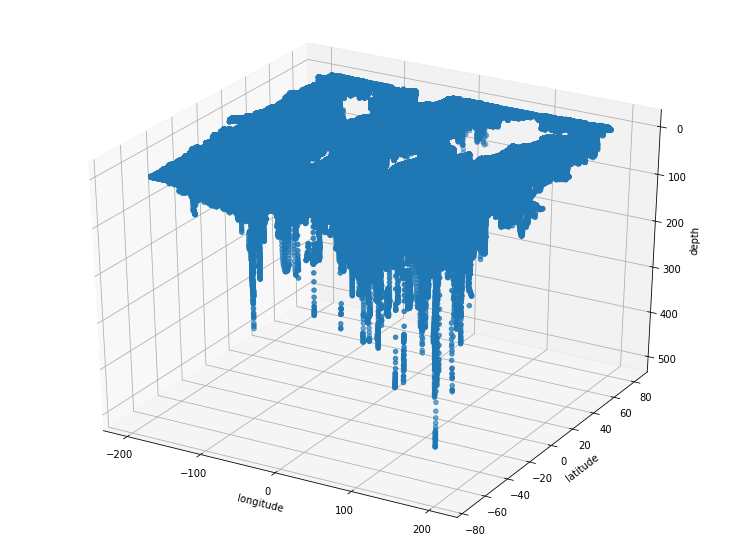

In [5]:
# 24/03/20- scatter plot for 3D lon, lat (no depth yet)

time = data['time'][:].squeeze()
lons = data['lon'][:].squeeze()
lats = data['lat'][:].squeeze()
depth = data['z'][:].squeeze()

fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')
ax.scatter(lons,lats,depth) #,c=time,cmap=plt.cm.jet)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('depth')
ax.invert_zaxis()

# im = ax.imshow(data, cmap='bone')
# fig.colorbar(im, cax=cax, orientation='vertical')

/home/dlobelle/.conda/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


(9620, 181)
(2948,)


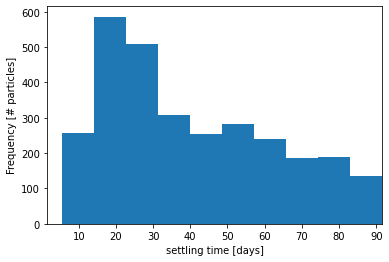

In [15]:
z_all = data['z']
#test = [np.array(z_all)>1.]
#len(z_all)

t1 = t0[1,:]

z_set = []
for i in range (len(z_all)):
    z0 = np.array(z_all[i,:])
    z1 = (np.where(z0 > 1.))
    z2 = z1[0]
    #print(z2)
    if not z2.any(): 
        continue
    else:
        z_set.append(z2[0])
        
t_set = t1[z_set]   

plt.hist(t_set)  
plt.xlabel('settling time [days]')
plt.ylabel('Frequency [# particles]')
plt.xlim(t1[0],t1[-1])
plt.title('')

print(z_all.shape)
print(t_set.shape)

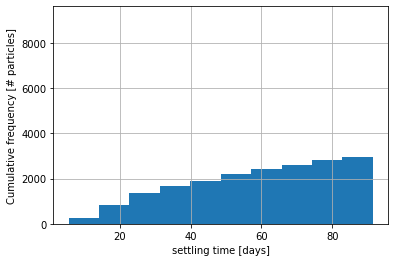

In [16]:
num_part = len(t)

chist = pd.Series(t_set)
chist.hist(cumulative=True) #, density=1, bins=100)
plt.xlabel('settling time [days]')
plt.ylabel('Cumulative frequency [# particles]') #/100
plt.ylim(0,num_part)
plt.show()

In [6]:
# #To compare orders of magnitude of 'vs': plastic's settling velocity against 'w': seawater's vertical velocity (results: 'vs' is 3 orders of mag stronger than 'w' for 0.1 mm plastic with vs of 100 m d-1)
# data = Dataset(dirwrite +'Kooi+NEMO_1DwithWadv_rho920_r1e-04_10days_10dtsecs_10hrsoutdt.nc')
# #data = Dataset(dirwrite +'Kooi+NEMO_1D_latslons.nc')
# t0 = data['time'][:]
# d0 = data['vs'][:]

# idx = [d0>0]
# t = t0[idx]/86400
# d = d0[idx]*86400

# plt.figure()
# plt.plot(t,d)
# plt.title('Vs of 100 m d-1 for 0.1 mm plastic')

# t0 = data['time'][:]
# d0 = data['w'][:]

# idx = [d0<0]
# t = t0[idx]/86400
# d = d0[idx]*86400

# plt.figure()
# plt.plot(t,d)
# plt.title('w of 0.1 m d-1')


In [22]:
simdays = 1/60
o = str(round(simdays,2))
print(o)

0.02
